# Exercício 3
![alt text]({D4B5FC8A-3E3A-4A56-865C-9812FE09FACF}.png)

![alt text]({D8B1AA91-146D-430C-AC36-3AF0FDBB4634}.png)

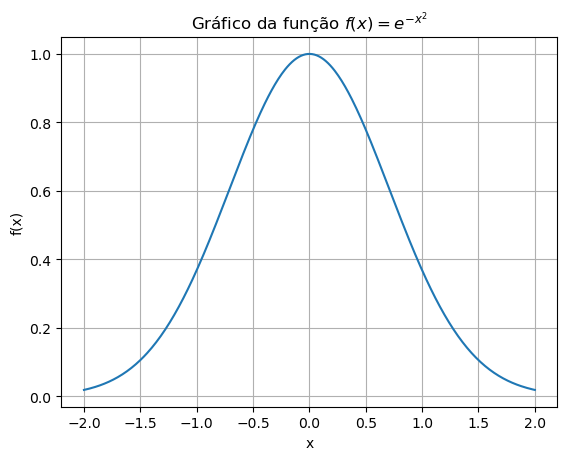

Integral de -1 a 1: 1.493648 (erro estimado: 1.66e-14)


In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
f = np.exp(-x**2)

plt.plot(x, f)
plt.title(r'Gráfico da função $f(x) = e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

from scipy.integrate import quad

resultado, erro = quad(lambda x: np.exp(-x**2), -1, 1)
print(f"Integral de -1 a 1: {resultado:.6f} (erro estimado: {erro:.2e})")


![alt text]({276448D2-37C1-4A37-9143-FEB276DBAD59}.png)

In [78]:
def f(x):
    return np.exp(-x**2)

N = 10
a = -1.0
b = 1.0

# Método dos trapézios
def trapezio(f, a, b, N):
    h = (b - a) / N
    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    return h * s

resultado_trapezio = trapezio(f, a, b, N)
print(f"Resultado do método dos trapézios: {resultado_trapezio:.6f}")

# Erro absoluto do método dos trapézios
erro_abs = abs(resultado - resultado_trapezio)
print(f"Erro absoluto: {erro_abs:.6f}")



Resultado do método dos trapézios: 1.488737
Erro absoluto: 0.004912


![alt text]({51D20A57-0060-4621-8CF3-75201531A234}.png)

In [79]:
# Regra de Simpson
def simpson(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N deve ser par")
    h = (b - a) / N
    s = f(a) + f(b)
    for k in range(1, N, 2):
        s += 4 * f(a + k * h)
    for k in range(2, N-1, 2):
        s += 2 * f(a + k * h)
    return (h / 3) * s

resultado_simpson = simpson(f, a, b, N)

# Erro absoluto da regra de Simpson
erro_simpson = abs(resultado - resultado_simpson)
print(f"Resultado da regra de Simpson: {resultado_simpson:.6f}")
print(f"Erro absoluto da regra de Simpson: {erro_simpson:.6f}")


Resultado da regra de Simpson: 1.493674
Erro absoluto da regra de Simpson: 0.000026


![alt text]({DC2170C3-B1D7-452E-8517-BF9F4162AF60}.png)

In [80]:
# N = 100
resultado_trapezio_100 = trapezio(f, a, b, 100)
resultado_simpson_100 = simpson(f, a, b, 100)
print(f"Resultado do método dos trapézios com N=100: {resultado_trapezio_100:.6f}")
print(f"Resultado da regra de Simpson com N=100: {resultado_simpson:.6f}")
# Erro absoluto com N=100
erro_abs_100 = abs(resultado - resultado_trapezio_100)
print(f"Erro absoluto do método dos trapézios com N=100: {erro_abs_100:.6f}")
erro_simpson_100 = abs(resultado - resultado_simpson_100)
print(f"Erro absoluto da regra de Simpson com N=100: {erro_simpson_100:.6f}")
print("-"*50)

# N = 1000
resultado_trapezio_1000 = trapezio(f, a, b, 1000)
resultado_simpson_1000 = simpson(f, a, b, 1000)     
print(f"Resultado do método dos trapézios com N=1000: {resultado_trapezio_1000:.6f}")
print(f"Resultado da regra de Simpson com N=1000: {resultado_simpson_1000:.6f}")
# Erro absoluto com N=1000
erro_abs_1000 = abs(resultado - resultado_trapezio_1000)
print(f"Erro absoluto do método dos trapézios com N=1000: {erro_abs_1000:.6f}")
erro_simpson_1000 = abs(resultado - resultado_simpson_1000)
print(f"Erro absoluto da regra de Simpson com N=1000: {erro_simpson_1000:.6f}")



Resultado do método dos trapézios com N=100: 1.493599
Resultado da regra de Simpson com N=100: 1.493674
Erro absoluto do método dos trapézios com N=100: 0.000049
Erro absoluto da regra de Simpson com N=100: 0.000000
--------------------------------------------------
Resultado do método dos trapézios com N=1000: 1.493648
Resultado da regra de Simpson com N=1000: 1.493648
Erro absoluto do método dos trapézios com N=1000: 0.000000
Erro absoluto da regra de Simpson com N=1000: 0.000000


![alt text]({A99EFEA3-F448-403D-9858-7CA3A84090A6}.png)

In [81]:
import numpy as np

def simpson_adaptativo(f, a, b, eps=1e-6):
    n = 2
    I_prev = None
    erro = float('inf')
    resultados = []

    while erro > eps:
        h = (b - a) / n
        # soma nos índices pares 
        even_sum = sum(f(a + k*h) for k in range(2, n, 2))
        S = (1/3) * (f(a) + f(b) + 2*even_sum)
        # soma nos índices ímpares 
        odd_sum = sum(f(a + k*h) for k in range(1, n, 2))
        T = (2/3) * odd_sum

        I = h * (S + 2*T)

        if I_prev is None:
            erro = float('inf')
            resultados.append((n, I, None))
        else:
            erro = abs((I - I_prev) / 15)
            resultados.append((n, I, erro))

        I_prev = I
        n *= 2

    return I, resultados


integral, dados = simpson_adaptativo(f, a, b, eps=1e-6)

print("Valor final da integral:", integral)
print("\nTabela:")
print("n\tIntegral\tErro")
for n, I, e in dados:
    if e is None:
        print(f"{n}\t{I:.10f}\t{'-'}")
    else:
        print(f"{n}\t{I:.10f}\t{e:.2e}")



Valor final da integral: 1.4936485148714607

Tabela:
n	Integral	Erro
2	1.5785862941	-
4	1.4943608578	5.62e-03
8	1.4937107596	4.33e-05
16	1.4936522411	3.90e-06
32	1.4936485149	2.48e-07


# Exercício 2
![alt text]({D7EE8AE7-396B-42C6-9084-9D50C60C1F10}.png)

![alt text]({46018223-EA1F-46F4-AE07-7D817F56D029}.png)

Máximo de f(x) no intervalo [0,4] encontrado em x = 1.0 com valor f(x) = 0.368


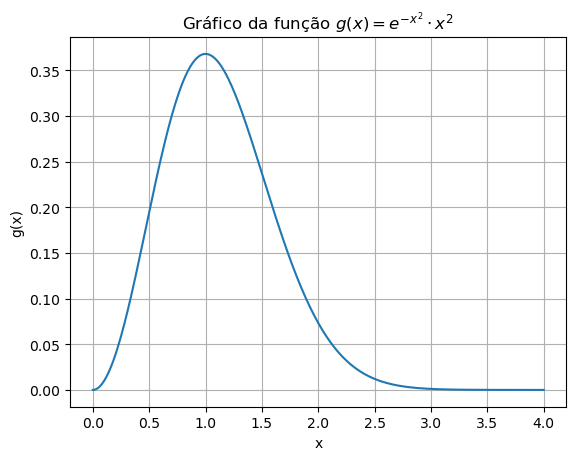

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return np.exp(-x**2) * x**2

x=np.linspace(0, 4, 400)


# Encontrar o máximo
result = minimize_scalar(lambda x: -f(x), bounds=(0, 4), method='bounded')
x_max = result.x
f_max = f(x_max)
print(f"Máximo de f(x) no intervalo [0,4] encontrado em x = {x_max:.1f} com valor f(x) = {f_max:.3f}")

f=f(x)
plt.plot(x, f)
plt.title(r'Gráfico da função $g(x) = e^{-x^2} \cdot x^2$')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.show()



![alt text]({9D47C73E-1ACD-49FC-B360-E0ADCAD45E3C}.png)

In [83]:
from numpy import ones,copy,cos,tan,pi,linspace


def f(x):
    return np.exp(-x**2) * x**2

# Substituição para lidar com o infinito: t = x / (1 + x)
def transformed_f(t):
    x = t / (1 - t)  # Transformação inversa
    dx_dt = 1 / (1 - t)**2  # Derivada de x em relação a t
    return f(x) * dx_dt

# utilizando o arquivo fornecido pelo livro
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def simpson(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N deve ser par")
    h = (b - a) / N
    s = f(a) + f(b)
    for k in range(1, N, 2):
        s += 4 * f(a + k * h)
    for k in range(2, N-1, 2):
        s += 2 * f(a + k * h)
    return (h / 3) * s


N = 50
a = 0.0
b = 0.999999 # limite superior ajustado para evitar uma divisão por 0

# Calculate the sample points and weights, then map them to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*transformed_f(xp[k])

print(f"Resultado da integração de 0 ao infinito com a quadratura Gaussiana: {s} \n")

resultado_simpson = simpson(transformed_f, a, b, N)
print(f"Resultado da integração de 0 ao infinito com a regra de Simpson: {resultado_simpson} \n")
# Erro absoluto da regra de Simpson
erro_simpson = abs(s - resultado_simpson)
print(f"Comparação da regra de Simpson com a quadratura Gaussiana: {erro_simpson} \n")

# valor de referencia
resultado, erro = quad(lambda x: np.exp(-x**2) * x**2, 0, np.inf)
print(f"Valor de referencia: {resultado:.6f} (erro estimado: {erro:.2e})")



Resultado da integração de 0 ao infinito com a quadratura Gaussiana: 0.44311346272785074 

Resultado da integração de 0 ao infinito com a regra de Simpson: 0.4431134432880828 

Comparação da regra de Simpson com a quadratura Gaussiana: 1.943976796203728e-08 

Valor de referencia: 0.443113 (erro estimado: 8.05e-09)


![alt text]({54043D8A-18A9-45A8-AF94-65F9F30F8747}.png)

In [89]:
N1 = 60  
N2 = 80  

# quadratura de Gauss
x1, w1 = gaussxwab(N1, a, b)
x2, w2 = gaussxwab(N2, a, b)

s1_gauss = sum(w1[k] * transformed_f(x1[k]) for k in range(N1))
s2_gauss = sum(w2[k] * transformed_f(x2[k]) for k in range(N2))

# estimativa de erro para quadratura de Gauss
erro_gauss = abs(s2_gauss - s1_gauss)

# regra de Simpson
s1_simpson = simpson(transformed_f, a, b, N1)
s2_simpson = simpson(transformed_f, a, b, N2)

# estimativa de erro para regra de Simpson
erro_simpson = abs(s2_simpson - s1_simpson)

# resultados
print(f"Quadratura de Gauss (N={N1}): {s1_gauss}")
print(f"Quadratura de Gauss (N={N2}): {s2_gauss}")
print(f"Erro estimado (Gauss): {erro_gauss:.6e}\n")

print(f"Regra de Simpson (N={N1}): {s1_simpson}")
print(f"Regra de Simpson (N={N2}): {s2_simpson}")
print(f"Erro estimado (Simpson): {erro_simpson:.6e}")

# método mais confiável
print("-"*50)
if erro_gauss < erro_simpson:
    print("Logo, a Quadratura de Gauss é mais confiável para esta função.")
else:
    print("Logo, a Regra de Simpson é mais confiável para esta função.")

Quadratura de Gauss (N=60): 0.4431134627263666
Quadratura de Gauss (N=80): 0.44311346272637914
Erro estimado (Gauss): 1.254552e-14

Regra de Simpson (N=60): 0.443113452745065
Regra de Simpson (N=80): 0.4431134594770194
Erro estimado (Simpson): 6.731954e-09
--------------------------------------------------
Logo, a Quadratura de Gauss é mais confiável para esta função.


# Exercício 3
![alt text]({32D1EBFA-4886-41D6-B22B-EC0E8C69AC9E}.png)